## Regular Expressions, and Text Analysis

We begin this lesson with an introduction to Regular Expressions. Last week, we gave a not-so-gentle introduction as to why regular expressions (regex) are, and why we are interested in them. Simply put, regex allows us to find patterns in a textual dataset, for either data scraping or collection purposes. 

After collecting the data, how should one go about analysing it? It turns out that there is a subfield in AIML that is dedicated to analysing textual data, called Natural Language Processing. We will take a look at some techniques on how to handle and analyse textual data.

---

#### Recommended Material for Python Programming

It is important to point out that most of the material used for this lesson is lifted from [Dr. Chuck Severance's Programming Course, Python for Everybody](https://www.py4e.com/). Personally, I took this online class for free, and benefitted greatly from it. 

Dr. Chuck teaches programming from an application-based approach as well, and is very patient in his explanations. I greatly recommend this course to everyone that wishes to learn Python Programming.

---

### Regular Expressions
To begin, let's read a text file into Python. We will use the mailbox file found in Dr. Chuck's PY4E class. In addition, we will be importing the regex library and string library. After reading the file, we will read the first 10 lines of the text file.

In [2]:
import re
import string

fhand = open('data/mbox-short.txt')
count = 0
for line in fhand:
    if count < 10:
        line = line.rstrip()
        print(line)
        count += 1
    else: 
        break

From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008
Return-Path: <postmaster@collab.sakaiproject.org>
Received: from murder (mail.umich.edu [141.211.14.90])
	 by frankenstein.mail.umich.edu (Cyrus v2.3.8) with LMTPA;
	 Sat, 05 Jan 2008 09:14:16 -0500
X-Sieve: CMU Sieve 2.3
Received: from murder ([unix socket])
	 by mail.umich.edu (Cyrus v2.2.12) with LMTPA;
	 Sat, 05 Jan 2008 09:14:16 -0500
Received: from holes.mr.itd.umich.edu (holes.mr.itd.umich.edu [141.211.14.79])


One of the things that regex can do is to search for patterns in a specific text. Suppose we are interested in the lines that has the text, From:.

In [3]:
for line in fhand:
    line = line.rstrip()
    if re.search('From:', line):
        print(line)

From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: gsilver@umich.edu
From: gsilver@umich.edu
From: zqian@umich.edu
From: gsilver@umich.edu
From: wagnermr@iupui.edu
From: zqian@umich.edu
From: antranig@caret.cam.ac.uk
From: gopal.ramasammycook@gmail.com
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: louis@media.berkeley.edu
From: ray@media.berkeley.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu


The string method, `rstrip()` strips the white space from the right side of the string. Note that this is not the only way to find all sentences that contains the string "From: ". What if we are only interested in sentences that **begin** with the string, "From: "? It turns out that we can use the regex, ^ (caret) to do so.

The caret (^) is used in regex to mark the start of a sentence.

In [4]:
fhand = open('data/mbox-short.txt')
for line in fhand:
    line = line.rstrip()
    if re.search('^From:', line):
        print(line)

From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: gsilver@umich.edu
From: gsilver@umich.edu
From: zqian@umich.edu
From: gsilver@umich.edu
From: wagnermr@iupui.edu
From: zqian@umich.edu
From: antranig@caret.cam.ac.uk
From: gopal.ramasammycook@gmail.com
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: louis@media.berkeley.edu
From: ray@media.berkeley.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu


#### Special Characters in Regex

But the power of regular expressions do not stop there. There are special characters in regex, that allows us to build even more powerful regular expressions. For example, the "." (fullstop) can be used in place of any character. That is, the regex, "F..m" can stand for any of the following: "From", "Form", "F@1m", "F%!m". Let's take a look at an example.

In [5]:
fhand = open('data/mbox-short.txt')
for line in fhand:
    line = line.rstrip()
    if re.search('^F..m:', line):
        print(line)

From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: gsilver@umich.edu
From: gsilver@umich.edu
From: zqian@umich.edu
From: gsilver@umich.edu
From: wagnermr@iupui.edu
From: zqian@umich.edu
From: antranig@caret.cam.ac.uk
From: gopal.ramasammycook@gmail.com
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: louis@media.berkeley.edu
From: ray@media.berkeley.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu


This idea can be made immensely more powerful, with the asterisk, \* and the plus sign, +. The asterisk matches 0 or more characters, while the plus sign matches 1 or more characters. If we have the following regex, "F+", we are interested in finding terms that have at least 1 F: "F", "Form", "From", "FF", "F12", while if we have the regex, "Fr\*", we are interested in finding terms that have at 1 F, and at least 0 r (so anything above fits the bill).

If we combine the full-stop with the asterisk to form the following regex, ".\*", it means we are interested in all the terms in the text.

In [6]:
fhand = open('data/mbox-short.txt')
for line in fhand:
    line = line.rstrip()
    if re.search('.*:', line):
        print(line)

From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008
Return-Path: <postmaster@collab.sakaiproject.org>
Received: from murder (mail.umich.edu [141.211.14.90])
	 Sat, 05 Jan 2008 09:14:16 -0500
X-Sieve: CMU Sieve 2.3
Received: from murder ([unix socket])
	 Sat, 05 Jan 2008 09:14:16 -0500
Received: from holes.mr.itd.umich.edu (holes.mr.itd.umich.edu [141.211.14.79])
	Sat, 5 Jan 2008 09:14:15 -0500
Received: FROM paploo.uhi.ac.uk (app1.prod.collab.uhi.ac.uk [194.35.219.184])
	 5 Jan 2008 09:14:10 -0500
Received: from paploo.uhi.ac.uk (localhost [127.0.0.1])
	Sat,  5 Jan 2008 14:10:05 +0000 (GMT)
Message-ID: <200801051412.m05ECIaH010327@nakamura.uits.iupui.edu>
Mime-Version: 1.0
Content-Transfer-Encoding: 7bit
Received: from prod.collab.uhi.ac.uk ([194.35.219.182])
          Sat, 5 Jan 2008 14:09:50 +0000 (GMT)
Received: from nakamura.uits.iupui.edu (nakamura.uits.iupui.edu [134.68.220.122])
	for <source@collab.sakaiproject.org>; Sat,  5 Jan 2008 14:13:33 +0000 (GMT)
Received: from naka

From: rjlowe@iupui.edu
Subject: [sakai] svn commit: r39765 - in gradebook/trunk/app: business/src/java/org/sakaiproject/tool/gradebook/business business/src/java/org/sakaiproject/tool/gradebook/business/impl ui ui/src/java/org/sakaiproject/tool/gradebook/ui/helpers/beans ui/src/java/org/sakaiproject/tool/gradebook/ui/helpers/entity ui/src/java/org/sakaiproject/tool/gradebook/ui/helpers/params ui/src/java/org/sakaiproject/tool/gradebook/ui/helpers/producers ui/src/webapp/WEB-INF ui/src/webapp/WEB-INF/bundle ui/src/webapp/content/templates
X-Content-Type-Outer-Envelope: text/plain; charset=UTF-8
X-Content-Type-Message-Body: text/plain; charset=UTF-8
Content-Type: text/plain; charset=UTF-8
X-DSPAM-Result: Innocent
X-DSPAM-Processed: Fri Jan  4 14:50:18 2008
X-DSPAM-Confidence: 0.7556
X-DSPAM-Probability: 0.0000
Details: http://source.sakaiproject.org/viewsvn/?view=rev&rev=39765
Author: rjlowe@iupui.edu
Date: 2008-01-04 14:48:37 -0500 (Fri, 04 Jan 2008)
New Revision: 39765
Added:
Modified:

Subject: [sakai] svn commit: r39761 - site/trunk/site-tool/tool/src/bundle
X-Content-Type-Outer-Envelope: text/plain; charset=UTF-8
X-Content-Type-Message-Body: text/plain; charset=UTF-8
Content-Type: text/plain; charset=UTF-8
X-DSPAM-Result: Innocent
X-DSPAM-Processed: Fri Jan  4 11:11:52 2008
X-DSPAM-Confidence: 0.7605
X-DSPAM-Probability: 0.0000
Details: http://source.sakaiproject.org/viewsvn/?view=rev&rev=39761
Author: gsilver@umich.edu
Date: 2008-01-04 11:10:04 -0500 (Fri, 04 Jan 2008)
New Revision: 39761
Modified:
Log:
http://bugs.sakaiproject.org/jira/browse/SAK-12595
This automatic notification message was sent by Sakai Collab (https://collab.sakaiproject.org/portal) from the Source site.
From zqian@umich.edu Fri Jan  4 11:11:03 2008
Return-Path: <postmaster@collab.sakaiproject.org>
Received: from murder (mail.umich.edu [141.211.14.97])
	 Fri, 04 Jan 2008 11:11:03 -0500
X-Sieve: CMU Sieve 2.3
Received: from murder ([unix socket])
	 Fri, 04 Jan 2008 11:11:03 -0500
Received: from

Of course, that's not very informative. But from this trivial example, you can see how we can combine different special characters to generate very intricate patterns that suit our purposes. We motivate this with an example.

---

#### Extracting Data with Regex
Suppose we are interested in generating an email list from this file. How can we do so? It turns out that one way is to make use of the "@" symbol that applies for emails. At this point in time, it is worth mentioning that regex uses a two-character sequence to find non-whitespace characters. Whitespaces are spaces created by pressing "spacebar, tab, or enter" on your computer. 

Let's use an example to illustrate this.

In [7]:
s = 'A message from csev@umich.edu to cwen@iupui.edu about meeting @2PM'
re.findall("\S+@\S+", s)

['csev@umich.edu', 'cwen@iupui.edu']

The regex, "\S+@\S+" tells Python to find strings that starts with 1 or more non-whitespace characters, followed by the character, "@" and ends with 1 or more non-whitespace characters. 

Naturally, this omits the term "@2PM". Why? Will the term, "cu@2" be omitted? Why or why not?

In addition, note that the function, `re.findall` returns a list containing **all**  the strings that fit the bill. There might be 0, 1, 2... strings in the list. To create a list of unique emails in the dataset, we can use a set to store these emails.

Let's apply this to our textual dataset.

In [8]:
fhand = open('data/mbox-short.txt')
email_set = set()
for line in fhand:
    line = line.rstrip()
    emails = re.findall('\S+@\S+', line)
    if len(emails) > 0:
        for email in emails:
            email_set.add(email)

len(email_set)

46

All in all, there are 46 unique email addresses in the textual dataset. Or are they all email addresses? Let's take a look at the set, `email_set` to find out.

In [9]:
email_set

{'<200801032122.m03LMFo4005148@nakamura.uits.iupui.edu>',
 '<200801032127.m03LRUqH005177@nakamura.uits.iupui.edu>',
 '<200801032133.m03LX3gG005191@nakamura.uits.iupui.edu>',
 '<200801032205.m03M5Ea7005273@nakamura.uits.iupui.edu>',
 '<200801032216.m03MGhDa005292@nakamura.uits.iupui.edu>',
 '<200801040023.m040NpCc005473@nakamura.uits.iupui.edu>',
 '<200801040905.m0495rWB006420@nakamura.uits.iupui.edu>',
 '<200801040932.m049W2i5006493@nakamura.uits.iupui.edu>',
 '<200801040947.m049lUxo006517@nakamura.uits.iupui.edu>',
 '<200801041106.m04B6lK3006677@nakamura.uits.iupui.edu>',
 '<200801041200.m04C0gfK006793@nakamura.uits.iupui.edu>',
 '<200801041403.m04E3psW006926@nakamura.uits.iupui.edu>',
 '<200801041502.m04F21Jo007031@nakamura.uits.iupui.edu>',
 '<200801041515.m04FFv42007050@nakamura.uits.iupui.edu>',
 '<200801041537.m04Fb6Ci007092@nakamura.uits.iupui.edu>',
 '<200801041608.m04G8d7w007184@nakamura.uits.iupui.edu>',
 '<200801041609.m04G9EuX007197@nakamura.uits.iupui.edu>',
 '<20080104161

For some emails, they either begin or end with the characters, "<", ">", "(" and "}". Let's tell Python and regex that we are interested in emails that begin with a number or an alphabet. How do we do so? We can use these regex:

1. [a-z] returns lower-case alphabets
2. [A-Z] returns upper-case alphabets
3. [0-9] returns numbers

Thus, our new regex will be `[a-zA-Z0-9]\S+@\S+[a-zA-Z0-9]`. This tells Python and regex that the pattern we are looking for has to start with an alphabet or a number, and has to end with an alphabet or a number.

In [10]:
fhand = open('data/mbox-short.txt')
email_set = set()
for line in fhand:
    line = line.rstrip()
    emails = re.findall('[a-zA-Z0-9]\S+@\S+[a-zA-Z0-9]', line)
    if len(emails) > 0:
        for email in emails:
            email_set.add(email)

len(email_set)

44

In [11]:
email_set

{'200801032122.m03LMFo4005148@nakamura.uits.iupui.edu',
 '200801032127.m03LRUqH005177@nakamura.uits.iupui.edu',
 '200801032133.m03LX3gG005191@nakamura.uits.iupui.edu',
 '200801032205.m03M5Ea7005273@nakamura.uits.iupui.edu',
 '200801032216.m03MGhDa005292@nakamura.uits.iupui.edu',
 '200801040023.m040NpCc005473@nakamura.uits.iupui.edu',
 '200801040905.m0495rWB006420@nakamura.uits.iupui.edu',
 '200801040932.m049W2i5006493@nakamura.uits.iupui.edu',
 '200801040947.m049lUxo006517@nakamura.uits.iupui.edu',
 '200801041106.m04B6lK3006677@nakamura.uits.iupui.edu',
 '200801041200.m04C0gfK006793@nakamura.uits.iupui.edu',
 '200801041403.m04E3psW006926@nakamura.uits.iupui.edu',
 '200801041502.m04F21Jo007031@nakamura.uits.iupui.edu',
 '200801041515.m04FFv42007050@nakamura.uits.iupui.edu',
 '200801041537.m04Fb6Ci007092@nakamura.uits.iupui.edu',
 '200801041608.m04G8d7w007184@nakamura.uits.iupui.edu',
 '200801041609.m04G9EuX007197@nakamura.uits.iupui.edu',
 '200801041610.m04GA5KP007209@nakamura.uits.iupu

#### Combining Search and Extracting

Suppose we are interested in finding terms that begin with "X-", and ends with an integer.

X-DSPAM-Confidence: 0.8475
X-DSPAM-Probability: 0.0000

We can do this with the following regex, 

`^X-\S*: [0-9]+$`, where the $ (dollar sign) signifies the end of the string. That is, we are telling Python that we are interested in terms that begin with "X-" and ends with an integer, from 0-9 (and there might be more than 1 of them).

In [12]:
fhand = open('data/mbox-short.txt')

count = 0
for line in fhand:
    line = line.rstrip()
    if re.search('X-\S*: [0-9.]+$', line):
        count += 1
        if count <= 10: print(line)

X-DSPAM-Confidence: 0.8475
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.6178
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.6961
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.7565
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.7626
X-DSPAM-Probability: 0.0000


Suppose we are only interested in the floating point numbers after the colon, ":". What can we do? It turns out that one way to extract terms or patterns we are interested in is to include the parentheses or round brackets, "( )".

In [14]:
fhand = open('data/mbox-short.txt')

count = 0
for line in fhand:
    line = line.rstrip()
    x_spam_floats = re.findall('^X-\S*: ([0-9.]+)$', line)
    if len(x_spam_floats) > 0:
        count += 1
        if count <= 10: print(x_spam_floats)

['0.8475']
['0.0000']
['0.6178']
['0.0000']
['0.6961']
['0.0000']
['0.7565']
['0.0000']
['0.7626']
['0.0000']


Note that the floating point numbers are given as strings, and will have to be converted to floating type before any analysis can be conducted.

---

In-class assignment:

There are a couple of lines with the following format in the text file: 
"Details: http://source.sakaiproject.org/viewsvn/?view=rev&rev=39772"

Extract the numbers from each of these lines.

In [15]:
## Your code here

We have the following text chunk:

                            "From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008"

How can we extract the time of day from the text chunk? As it turns out, we can use the following regex:

`^From .+ ([0-9:]+) \S+`

In [16]:
s = "From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008"
re.findall('^From .+ ([0-9:]+) [0-9]+', s)

['09:14:16']

In [18]:
fhand = open('data/mbox-short.txt')

count = 0
for line in fhand:
    line = line.rstrip()
    tod = re.findall('^From .+ ([0-9:]+) [0-9]+', line)
    if len(tod) > 0:
        count += 1
        if count <= 10: print(tod)

['09:14:16']
['18:10:48']
['16:10:39']
['15:46:24']
['15:03:18']
['14:50:18']
['11:37:30']
['11:35:08']
['11:12:37']
['11:11:52']


Let's take some time to understand what we are trying to do with the regex, and why it works. Is each part of the regex crucial? Why or why not?

#### Escape Character

Note that "\$" was used to denote the end of the string. Suppose we are interested in extracting the amount of money ($20) in the following question:

"Jane spent $20 on cookies this afternoon".

How do we do so? It turns out that we can use the backslash operator, "\" to do so.

In [19]:
s = 'Jane spent $20 on cookies this afternoon.'
re.findall('\$\S+', s)

['$20']

In-class assignment:

Check whether there are any terms which starts with "\$" in the text file. If so, extract the amount without the "\$" sign.

#### Summary

Here are some important characters in the field of regex:

    1. ^ - beginning of line
    2. $ - end of line
    3. . - matches any character
    4. \s - matches all whitespaces
    5. \S - matches all non-whitespaces (opposite of \s)
    6. * - matches 0 or more of the preceeding character
    7. *? - matches 0 or more of the preceeding character, but non-greedy
    8. + - matches 1 or more of the preceeding character
    9. +? - matches 1 or more of the preceeding character, but non-greedy
    10. ? - matches 0 or 1 time of the preceeding character
    11. ?? - matches 0 or 1 time of the preceeding character, but non-greedy
    12. [aeiou] - matches all vowels
    13. [a-z] - matches all alphabetical characters, in lower-case
    14. [A-Z] - matches all alphabetical characters, in upper-case
    15. [0-9] - matches all numbers, from 0 to 9
    16. [^a-zA-Z] - matches everything except for alphabetical characters
    17. ( ) - used for extracing a subset of the matching string

Due to time constraints, we can only manage to do that much with regex. Keeping in mind that we are barely scratching the surface on regular expressions, you may find the following material useful:

1. [Dr Chuck's course on Regular Expressions](https://www.py4e.com/html3/11-regex) - Primer on Regex
2. [Regular-Expressions.info](https://www.regular-expressions.info/) - Tutorial on Regex

Without further ado, let's jump right in to Text Analysis.

### Text Analysis + Natural Language Processing

In the following section, we will be showing some techniques on how to conduct analysis on textual datasets. To help us to do so, we will be using a dataset from Kaggle which was used as part of a data science competition, [Spooky Author Identification](https://www.kaggle.com/c/spooky-author-identification).

Let's take a look at the dataset to know what we are dealing with. We can import data using pandas.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dat = pd.read_csv('data/SpookyAuthor/train.csv')

In [21]:
dat.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


The competition requires us to predict which author wrote the text, using the textual information provided. There are 3 authors one can choose from: EAP - Edgar Allen Poe, HPL - Howard P. Lovecraft or MWS - Mary W. Shelley.

We begin by importing key libraries that contains functions for us to clean the textual data.

In [22]:
import re
import nltk # nltk stands for natural language toolkit
from textstat.textstat import textstat
from wordcloud import WordCloud

#### Text Cleaning

Before we can use the textual data for analysis, we have to clean the data. What do we mean by "cleaning the data"? In this case, we convert words to lower-case, and strip punctuation marks and whitespaces (such as \t (created by the 'tab' button) and \n ('enter' button)). In addition, we can also remove typically uninformative terms, such as numbers and stopwords.

In [23]:
import string

def text_cleaning(text):
    # Remove punctuations from the text column
    translator = str.maketrans('', '', string.punctuation)
    cleaned_text = text.translate(translator)
    
    # Convert all letters to lower case
    cleaned_text = cleaned_text.lower()
    return cleaned_text

dat['cleaned_text'] = dat.text.apply(lambda x: text_cleaning(x))

In [24]:
dat.cleaned_text.head()

0    this process however afforded me no means of a...
1    it never once occurred to me that the fumbling...
2    in his left hand was a gold snuff box from whi...
3    how lovely is spring as we looked from windsor...
4    finding nothing else not even gold the superin...
Name: cleaned_text, dtype: object

What are some of the most popular words? Recall that we can create a dictionary and loop over all texts and collect the counts of each word in the data.

In [25]:
from collections import Counter

def top_20_words(data, col, author):
    text_column = data[data['author'] == author][col]
    
    word_count_dict = {}
    for text in text_column:
        # Split text by space to create a list
        for word in text.split(' '):
            try: word_count_dict[word] += 1
            except: word_count_dict[word] = 1

    top_words_counter = Counter(word_count_dict)
    mc = top_words_counter.most_common(20)
    return [word for (word, value) in mc], [value for (word, value) in mc]

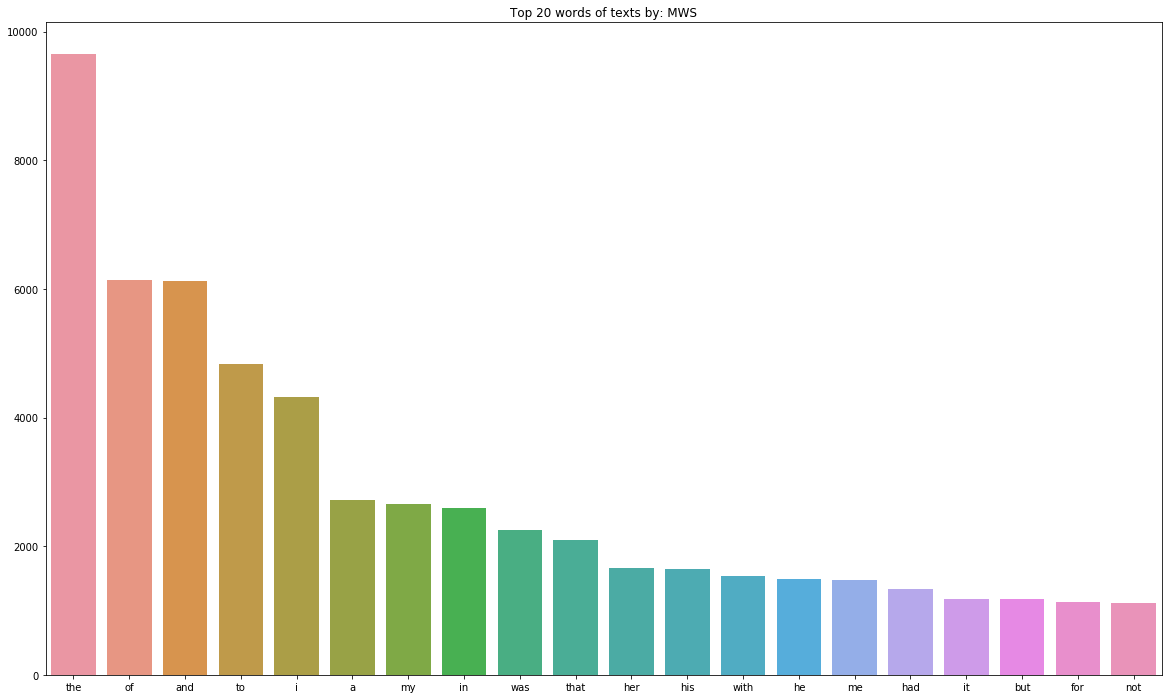

In [26]:
def plot_top_20_words(data, col, author):
    plt.figure(figsize=(20, 12))
    words, freq = top_20_words(data, col, author)
    
    x_pos = np.arange(len(words)) 
    sns.barplot(x_pos, freq)
    plt.xticks(x_pos, words)
    plt.title('Top 20 words of texts by: %s' % author)
    plt.show()
    
plot_top_20_words(dat, 'cleaned_text', 'MWS')

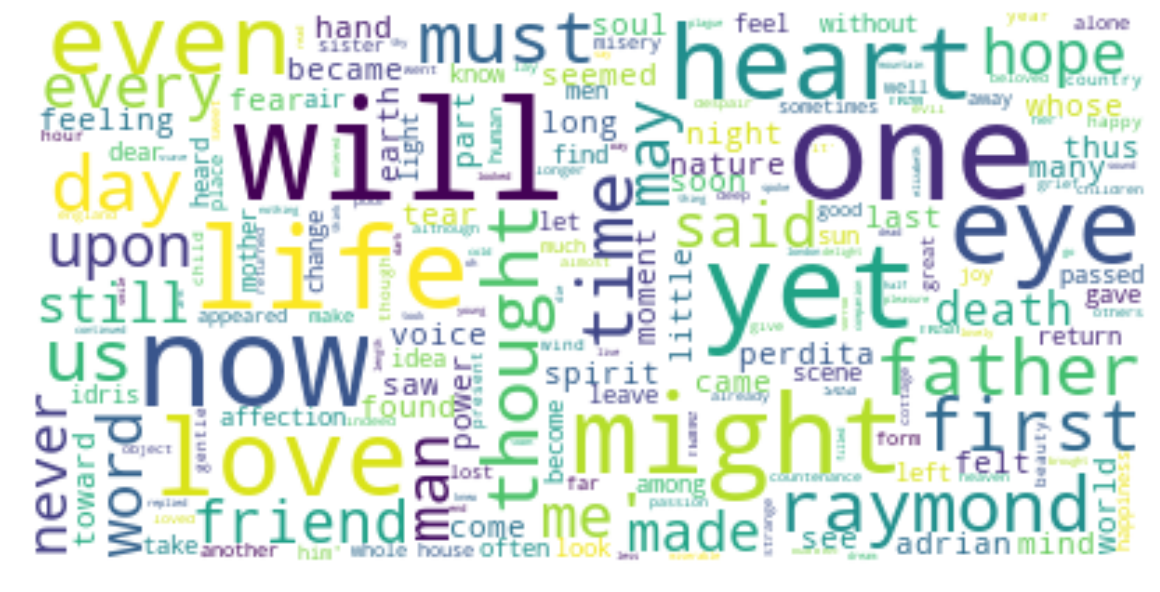

In [27]:
def generate_wordcloud(data, author):
    text_column = data[data['author'] == author].cleaned_text
    wordcloud = WordCloud(background_color='white', max_font_size = 50).generate(str(text_column.tolist()))

    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

generate_wordcloud(dat, 'MWS')

As it turns out, the top 20 words are not very informative. Words such as "the", "of", "and" appear way too many times, but they are not indicative of the authors (we do not expect some authors to use "the" more often than others). As it turns out, there is a term to classify such words: stop words. Stop words are words which do not contain important significance to be used in Search Queries. The NLTK package has a function to remove stop words from texts.

In [28]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
list(stopwords)[:6]

['for', 'more', 'will', 'wasn', 'which', 'yourself']

In [29]:
def remove_stopwords(text):
    # Removing stopwords (takes a relatively longer amount of time)
    wordlist = text.split(' ')
    return ' '.join([word for word in wordlist if word not in stopwords])

dat['new_cleaned_text'] = dat.cleaned_text.apply(lambda x: remove_stopwords(x))
dat['new_cleaned_text'].head()

0    process however afforded means ascertaining di...
1           never occurred fumbling might mere mistake
2    left hand gold snuff box capered hill cutting ...
3    lovely spring looked windsor terrace sixteen f...
4    finding nothing else even gold superintendent ...
Name: new_cleaned_text, dtype: object

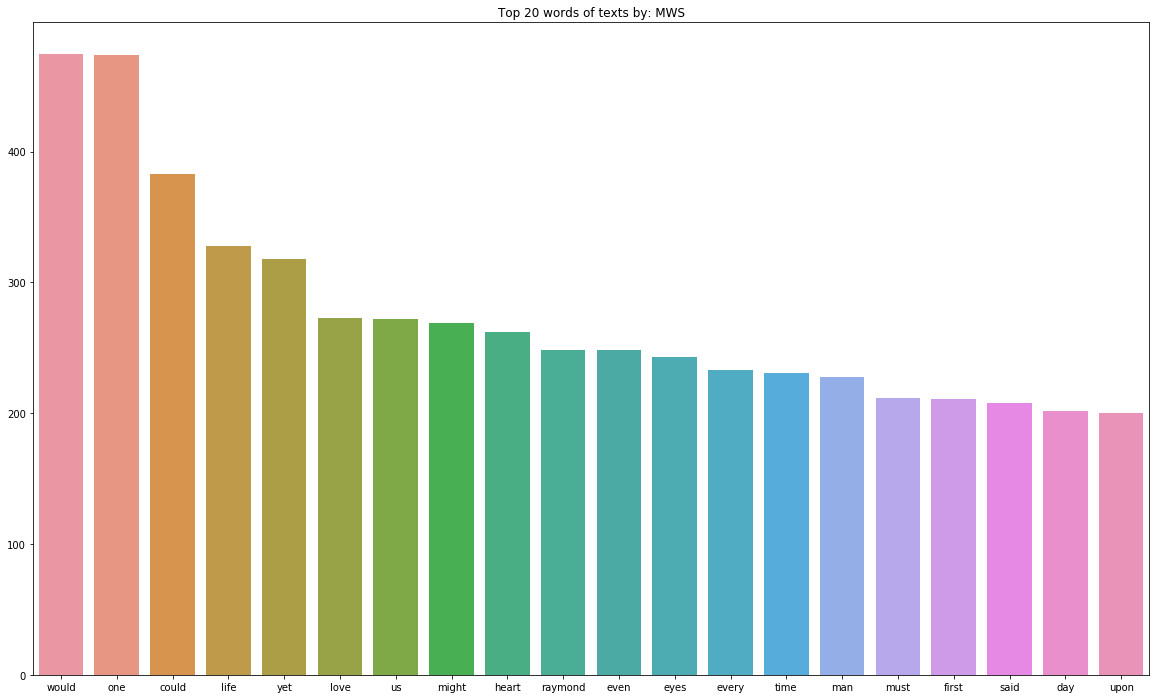

In [30]:
plot_top_20_words(dat, 'new_cleaned_text', 'MWS')

From the `new_cleaned_text` column, we can proceed to generate some features. One technique to generate features is to find the number per Parts of Speech tags in a sentence.

---

### Feature Generation

#### Part-of-Speech Tagging
According to NLTK, part-of-speech tagging, or POS-tagging is the process of classifying words into their parts of speech and labeling them accordingly. Parts of speech are also known as word classes or lexical categories. The collection of tags used for a particular task is known as a tagset. In written English, there are nine main Parts of Speech: noun, pronoun, verb, adverb, preposition, adjective, determiner, conjunction and interjection. 

For our analysis, we can look at the number of nouns, verbs and adjectives in each sentence, and potentially use them as features. Intuitively, the writing style differs from authors to authors. We would expect certain authors to use more nouns, verbs or adjectives relative to other authors. Let's make use of this observation to create more features.

In [31]:
def pos_tagging(text): return nltk.pos_tag(nltk.word_tokenize(text))

We can create a dictionary to store the number of part-of-speech tags for each text, and use that to create a dataframe.

In [32]:
def pos_tag_count(list_postags):
    # Return dictionary of dataframes with postags as keys and counts as values
    dict_of_postags = {}
    for tag in list_postags:
        dict_of_postags[tag[1]] = dict_of_postags.get(tag[1], 0) + 1
    return dict_of_postags

pos_tags_column = dat.cleaned_text.apply(lambda x: pos_tagging(x))
postags_df = pd.DataFrame(pos_tags_column.apply(pos_tag_count).to_dict()).T
postags_df.head()

,$,'',CC,CD,DT,EX,FW,IN,JJ,JJR,...,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB
0,NaN,NaN,1.0,NaN,6.0,NaN,NaN,5.0,2.0,NaN,...,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,5.0,NaN,NaN,6.0,4.0,NaN,...,NaN,3.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,2.0,NaN,NaN,6.0,5.0,1.0,...,NaN,2.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0
4,NaN,NaN,1.0,NaN,2.0,NaN,NaN,3.0,1.0,NaN,...,1.0,1.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN


Applying the POS-tagging function on the cleaned text yields the above dataframe. We can append these features to the main dataframe and check the correlation between these features and the dependent variable, "author".

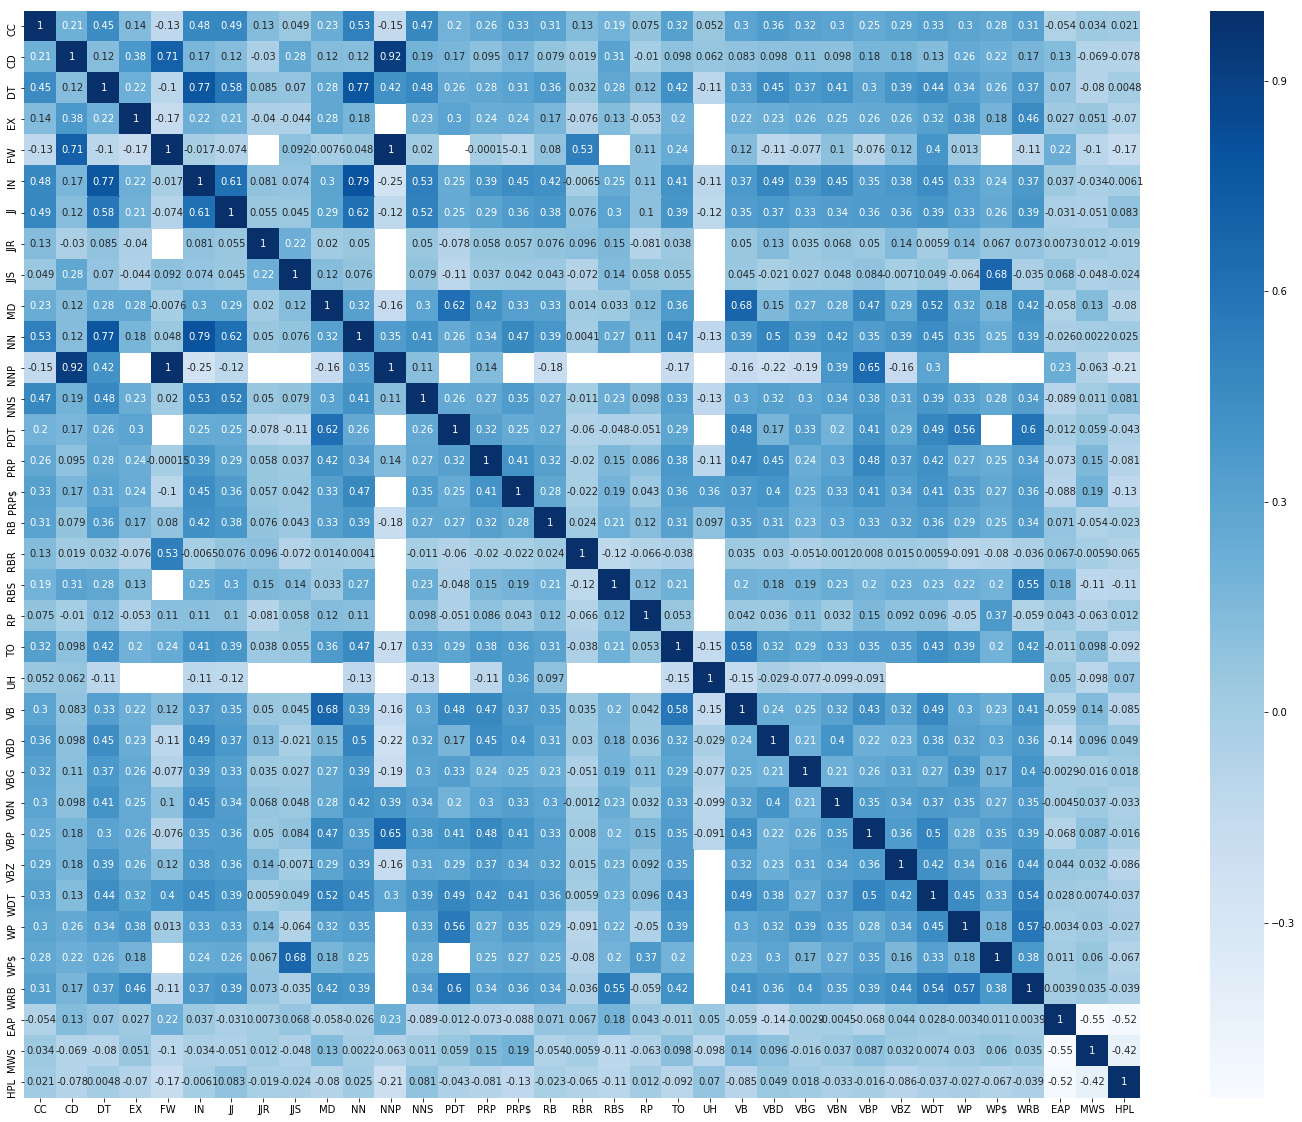

In [33]:
def merge_df(dat, postags_df):
    dat['EAP'] = dat.author == 'EAP'
    dat['MWS'] = dat.author == 'MWS'
    dat['HPL'] = dat.author == 'HPL'
    
    return pd.merge(dat, postags_df, left_index=True, right_index=True)

def corr_plot_postags(df, postags_df):
    columns = [col for col in postags_df.columns if col not in ["$", "''"]] + ['EAP', 'MWS', 'HPL']
    
    plt.figure(figsize=(25, 20))
    sns.heatmap(df[columns].corr(), cmap="Blues", annot=True)
    plt.show()
    
corr_plot_postags(merge_df(dat, postags_df), postags_df)

Which features are highly correlated with the authors? Typically, we pick highly correlated features to predict the author of the text. However, POS-tagging is only one way to generate features. Another popular way of generating usable features from text is by using the tf-idf technique. Tf-idf stands for term-frequency-inverse document frequency

---

#### Tf-idf
[tf–idf or TFIDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. 

The idea is as follows: if a term appears very often within and across all documents, then it is unlikely to be very informative of the document. This applies to words like "the", "if", "and" etc. From our texts, that appears to be the case - this is the reason why we removed stopwords in the first place!

On the other hand, if a word appears frequently in a text, but does not appear across all the other texts, then chances are, it is very informative of the document. For example, a newspaper article written on the animal, Jellyfish, is likely to mention "Jellyfish" a number of times, but other articles are unlikely to mention Jellyfish. 

As it turns out, Python has a library called scikit-learn that allows us to create tf-idf features.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

min_df = 2
ngram_range=(1, 3)

def vectorize_tfidf(data, min_df, ngram_range):
    # Use TfidfVectorizor to remove english stopwords and tokens that don't appear in at least 2 documents
    # Only focus on unigrams, bigrams and trigrams
    vect = TfidfVectorizer(min_df=min_df, 
                           ngram_range=ngram_range, 
                           stop_words='english')
    
    # Fit on the whole dataframe
    full_tfidf = vect.fit_transform(data.text)
    
    return full_tfidf

full_tfidf  = vectorize_tfidf(dat, min_df=min_df, ngram_range=ngram_range)
full_tfidf

<19579x27682 sparse matrix of type '<class 'numpy.float64'>'
	with 242323 stored elements in Compressed Sparse Row format>

From the sparse matrix, we observe that there are 27682 unique unigrams, bigrams and trigrams. This begs the question: what are unigrams, bigrams and trigrams? How do we decide the parameters, `min_df` and `ngram_range`?

##### Hyperparameter Selection
As it turns out, much of what we know about parameter selection is through practice and experience. Of course, one can loop over different parameters using a GridSearch to find the optimal parameters, but that may prove to be too time-consuming. As a start, we typically set `min_df` to 2 or 3, and `ngram_range` to (1, 2) or (1, 3).

Other than Tf-idf, we can also use CountVectorizer. While Tf-idf gives a different weight to different terms, CountVectorizer treats the term equally. However, we can still provide a list of stopwords for the Vectorizer to reduce the dimensionality of the data. 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

min_df = 2
ngram_range=(1, 3)

def vectorize_count(data, min_df, ngram_range):
    # Use TfidfVectorizor to remove english stopwords and tokens that don't appear in at least 2 documents
    # Only focus on unigrams, bigrams and trigrams
    vect = CountVectorizer(min_df=min_df, 
                           ngram_range=ngram_range, 
                           stop_words='english')
    
    # Fit on the whole dataframe
    full_count = vect.fit_transform(data.text)
    
    return full_count

full_count  = vectorize_count(dat, min_df=min_df, ngram_range=ngram_range)
full_count

<19579x27682 sparse matrix of type '<class 'numpy.int64'>'
	with 242323 stored elements in Compressed Sparse Row format>

Unsurprisingly, they yield the same number of terms. However, the values of the cells are different. Depending on the application, certain vectorizers may work better or worse. We can use a validation set to decide which set of parameters and hyperparameters to use.

### Conclusion

To round up our discussion of Text Analysis and Natural Language Processing as well as provide a primer on Machine Learning with Text Analysis, let's look at some iPython notebooks written by other coders:

1. [Sentiment Analysis](https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf)
2. [SpookyAuthorPy](https://github.com/ngbolin/SpookyAuthorPy/blob/master/SpookyAuthorPy.ipynb)